<a href="https://colab.research.google.com/github/tabaraei/Data-Science-Toolkit/blob/master/Scikit-Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook presents some typical procedures involved in the machine learning tasks, such as loading the dataset, data wrangling, preprocessing, modelling, and visualizations. You can refer to the [API Reference](https://scikit-learn.org/stable/modules/classes.html) and [User Guide](https://scikit-learn.org/stable/user_guide.html#user-guide) of scikit-learn for the available online documentation.

# Setting the enivironment

In order to access the latest scikit-learn release, consider running `!pip install --upgrade scikit-learn` (restart the runtime afterwards).

In [ ]:
# %%capture
# !pip install --upgrade scikit-learn

We should also consider activating the diagram display to see the visualized model throughout our analysis.

In [ ]:
from sklearn import set_config

set_config(display='diagram')

# 1- Dataset

Either looking for an artifical dataset generator or ready-to-load datasets, they are all available at [this link](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) on the scikit-learn documentation.

## 1-1- Generated Datasets

Using [drawdata](https://drawdata.xyz/) website, you can easily draw points on the flow, and download the corresponding `csv` file to play with.

Using the generators available in the scikit-learn documentation [here](https://scikit-learn.org/stable/modules/classes.html#samples-generator), we can easily define a toy dataset of our own choice with the required settings to begin the modelling. They can be imported using `from sklearn.datasets import make_FUNCTION_NAME`. Below, you can find some samples of dataset generatiors for different purposes.

### 1-1-1- Classification and Clustering Generators

These generators produce a matrix of features and corresponding discrete targets, either for _single label_ or _multilabel_ tasks. Also, for the information regarding Biclustering please refer to the [documentation](https://scikit-learn.org/stable/datasets/sample_generators.html#biclustering).

**1. Single-Label Generators**

- `make_blobs` creates _multiclass_ datasets by allocating each class __one or more__ normally-distributed clusters of points. It provides greater control regarding the centers and standard deviations of each cluster, and is used to demonstrate clustering.

- `make_classification` creates _multiclass_ datasets by allocating each class __one or more__ normally-distributed clusters of points. It specializes in introducing noise by way of: correlated, redundant and uninformative features; multiple Gaussian clusters per class; and linear transformations of the feature space.

- `make_gaussian_quantiles` divides a single Gaussian cluster into near-equal-size classes separated by concentric hyperspheres.

- `make_hastie_10_2` generates a similar binary, 10-dimensional problem.

- `make_circles` and `make_moons` generate 2d binary classification datasets that are challenging to certain algorithms (e.g. _centroid-based clustering_ or _linear classification_), including optional Gaussian noise. They are useful for visualization. `make_circles` produces Gaussian data with a spherical decision boundary for binary classification (a large circle containing a smaller circle in 2D), while `make_moons` produces two interleaving half circles.

**2. Multilabel Generators:**

`make_multilabel_classification` generates random samples with multiple labels, reflecting a bag of words drawn from a mixture of topics. The number of topics for each document is drawn from a Poisson distribution, and the topics themselves are drawn from a fixed random distribution. Similarly, the number of words is drawn from Poisson, with words drawn from a multinomial, where each topic defines a probability distribution over words. Simplifications with respect to true bag-of-words mixtures include:

- Per-topic word distributions are independently drawn, where in reality all would be affected by a sparse base distribution, and would be correlated.

- For a document generated from multiple topics, all topics are weighted equally in generating its bag of words.

- Documents without labels words at random, rather than from a base distribution.

Below, you can find some of the **single-label** generators for the classification and clustering tasks.

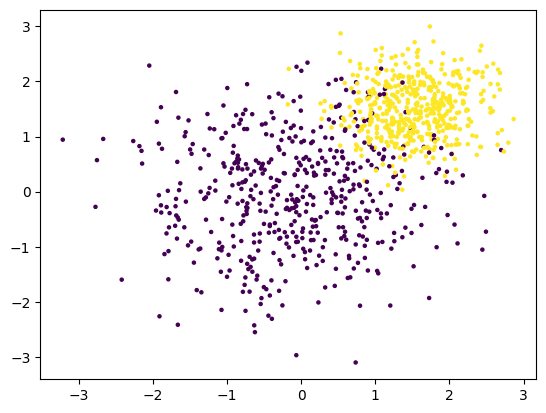

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=1000, n_features=2, centers=[(0, 0), (1.5, 1.5)], cluster_std=[1, 0.5])
plt.scatter(X[:, 0], X[:, 1], c=y, s=5);

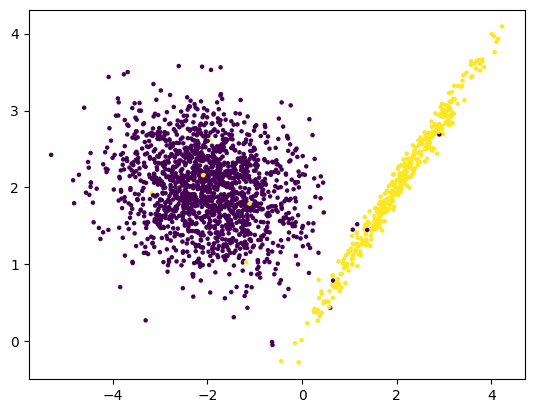

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=2000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, weights=[0.7, 0.1], class_sep=2, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, s=5);

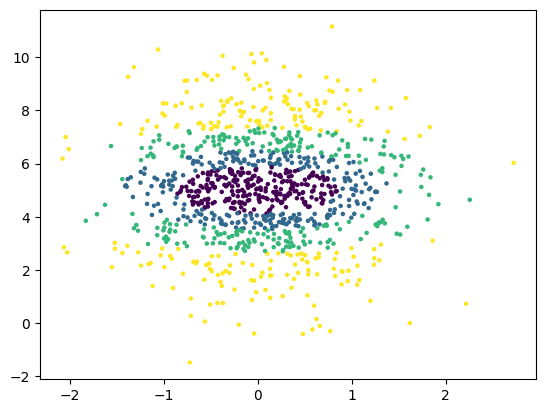

In [ ]:
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt

X, y = make_gaussian_quantiles(n_samples=1000, n_classes=4, n_features=2, mean=[0, 5], cov=[0.5, 4.0], random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, s=5);

In [ ]:
from sklearn.datasets import make_hastie_10_2
import pandas as pd
import numpy as np

X, y = make_hastie_10_2(n_samples=12_000, random_state=1)
pd.DataFrame(np.c_[X, y]).head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,1.624345,-0.611756,-0.528172,-1.072969,0.865408,-2.301539,1.744812,-0.761207,0.319039,-0.249370,1.0
1,1.462108,-2.060141,-0.322417,-0.384054,1.133769,-1.099891,-0.172428,-0.877858,0.042214,0.582815,1.0
2,-1.100619,1.144724,0.901591,0.502494,0.900856,-0.683728,-0.122890,-0.935769,-0.267888,0.530355,-1.0
3,-0.691661,-0.396754,-0.687173,-0.845206,-0.671246,-0.012665,-1.117310,0.234416,1.659802,0.742044,-1.0
4,-0.191836,-0.887629,-0.747158,1.692455,0.050808,-0.636996,0.190915,2.100255,0.120159,0.617203,1.0


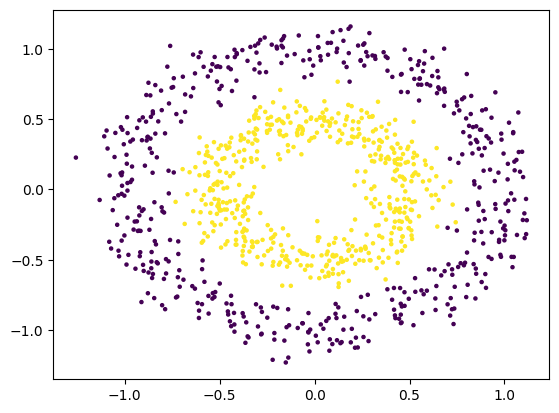

In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, s=5);

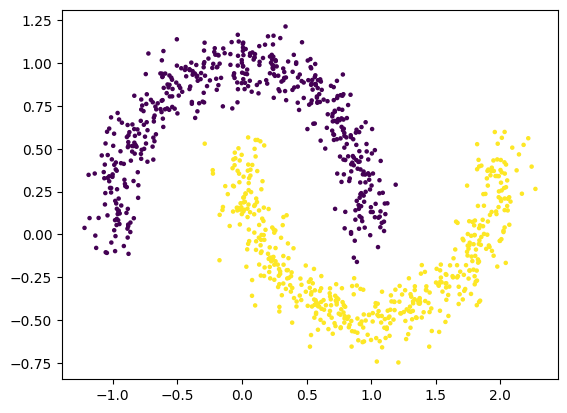

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, s=5);

### 1-1-2- Regression Generators

**1. Linear Relations Generator:**

- `make_regression` produces regression targets as an optionally-sparse random linear combination of random features, with noise. Its informative features may be uncorrelated, or low rank (few features account for most of the variance). Other regression generators generate functions deterministically from randomized features.

- `make_sparse_uncorrelated` produces a target as a linear combination of four features with fixed coefficients.

**2. Non-Linear Relations Generator:**

- `make_friedman1` is related by polynomial and sine transforms;
- `make_friedman2` includes feature multiplication and reciprocation;
- and `make_friedman3` is similar with an arctan transformation on the target.

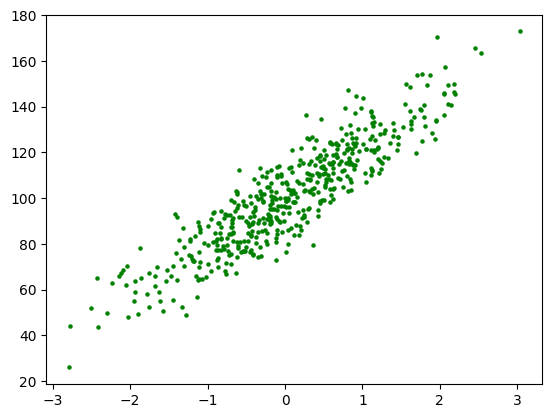

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=500, n_features=1, bias=100, noise=10, random_state=1)
plt.scatter(X, y, c='green', s=5);

We can also use mathematical functions and random samples to generate data for the regression task:
- `np.random.rand(d0, d1, ..., dn)` creates an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).
- `np.random.randn(d0, d1, ..., dn)` returns an array filled with random floats sampled from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1. For random samples from the normal distribution with mean mu and standard deviation sigma, use `sigma * np.random.randn(...) + mu` instead.

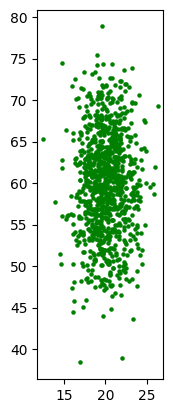

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mu = 20
sigma = 2
X = sigma * np.random.randn(1000, 1) + mu
y = (sigma * np.random.randn(1000, 1) + mu) * 3

plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(X, y, c='green', s=5);

Also, we can use the Numpy's `random` module to create our own _uniform_ or _normal_ distribution of values.

In [ ]:
import numpy as np

def regression_generator(n_samples=1000, mu=0, sigma=0.1, expr=None):
    # Force the X random samples within range [-1, 1]
    X = np.random.rand(n_samples) * 2 - 1
    y = X.copy()

    # Add some noise to y to make it a regression problem
    noise = np.random.normal(mu, sigma, n_samples)
    y += noise

    # apply a mathematical expression to the y values w.r.t. X
    if expr: y = eval(expr)

    return X, y

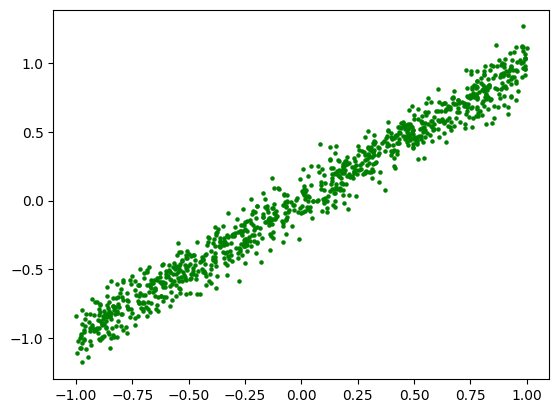

In [ ]:
import matplotlib.pyplot as plt

X, y = regression_generator()
plt.scatter(X, y, c='green', s=5);

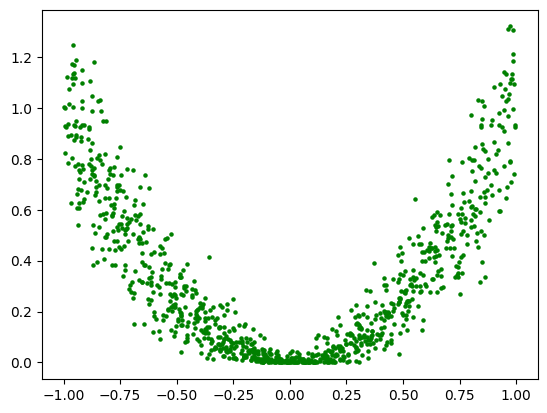

In [ ]:
import matplotlib.pyplot as plt

X, y = regression_generator(expr='y**2')
plt.scatter(X, y, c='green', s=5);

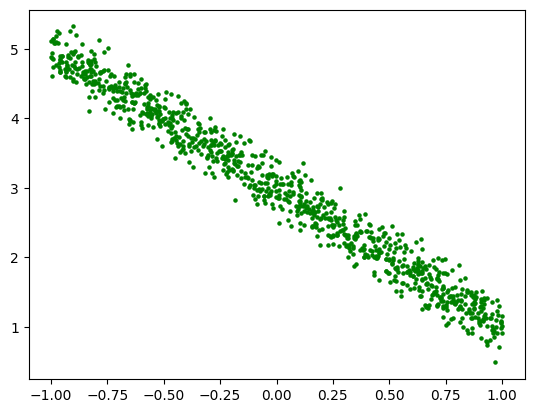

In [ ]:
import matplotlib.pyplot as plt

X, y = regression_generator(expr='-2*y + 3')
plt.scatter(X, y, c='green', s=5);

## 1-2- Dataset Loaders

The `sklearn.datasets` module includes utilities to load datasets, including methods to load and fetch popular reference datasets. Full list of datasets can be found [here](https://scikit-learn.org/stable/modules/classes.html#loaders).

### 1-2-1- scikit-learn Reference Datasets

They can be easily accessed by either:
- `from sklearn.datasets import fetch_DATASET_NAME`
- `from sklearn.datasets import load_DATASET_NAME`

In [ ]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True, as_frame=True)
X.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930


#### 1-2-1-1- Classification Datasets

In [ ]:
from sklearn.datasets import load_breast_cancer, load_digits, load_iris, load_wine

X, y = load_breast_cancer(return_X_y=True)
X, y = load_digits(return_X_y=True)
X, y = load_iris(return_X_y=True)
X, y = load_wine(return_X_y=True)

#### 1-2-1-2 Regression Datasets

In [ ]:
from sklearn.datasets import load_diabetes, fetch_california_housing

X, y = load_diabetes(return_X_y=True)
X, y = fetch_california_housing(return_X_y=True)

### 1-2-2- OpenML Reference Datasets

Using `datasets.fetch_openml` along with the dataset name/id and its version, we can easily get access to numerous public datasets available on [OpenML](https://www.openml.org/search?type=data&sort=runs&status=active) for different tasks.

In [ ]:
from sklearn.datasets import fetch_openml

train_data = fetch_openml(name='adult', version=2, as_frame=True, parser='auto')
train_df = train_data.frame

print(train_data.DESCR)
train_df.head(3)

**Author**: Ronny Kohavi and Barry Becker  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Adult) - 1996  
**Please cite**: Ron Kohavi, "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid", Proceedings of the Second International Conference on Knowledge Discovery and Data Mining, 1996  

Prediction task is to determine whether a person makes over 50K a year. Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

This is the original version from the UCI repository, with training and test sets merged.

### Variable description

Variables are all self-explanatory except __fnlwgt__. This is a proxy for the demographic background of the people: "People with similar demographic characteristics should have similar weights". This similarity-statement is not transferable across the 51 different states.

Description f

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


# 2- Data Exploration

In [ ]:
# # check whether they are an indicator of the target, or they can be easily removed if they do not provide any information.
# sns.countplot(data=train_df, x='feature', hue='target', palette='RdBu')
# plt.xticks(rotation=90);

# 3- Preprocessing

Let's consider using an unpreprocessed dataset take from the Seaborn's datasets, and clean the dataset accordingly.

In [ ]:
import seaborn as sns

train_df = sns.load_dataset('titanic')
X = train_df.drop(['alive'], axis='columns')
y = train_df['alive']
X.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True


## 3-1- Data Types

We might need to perform some data type convertions to make our modelling process easier. Also, we separate our numerical and categorical columns to analyze them separately.

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(4)
memory usage: 73.7+ KB


In [ ]:
X['alone'] = X['alone'].astype(int)
X['adult_male'] = X['adult_male'].astype(int)
X.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male        int64
deck           category
embark_town      object
alone             int64
dtype: object

In [ ]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_cols)

numerical_cols = X.select_dtypes(exclude=['object', 'category']).columns.tolist()
print(numerical_cols)

['sex', 'embarked', 'class', 'who', 'deck', 'embark_town']
['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone']


## 3-2- Feature Selection

Throughout our analysis, we will keep our main focus on providing preprocessing methods to satisfy the modelling performance at its best. Some of the __features__ in our dataset should be __immediately removed__ due to their __irrelevance to our analysis__.

It is worthy to note that, these assumptions should be later tested with respect to our baseline model, and to be checked if they can improve the performance of our model or not.

The process of _feature selection_ could be also automized using the `sklearn.feature_selection` module, where there are a variety of methods to apply to our dataset __to find the most promising features__.

For example, in the `titanic` dataset, it is clear that the `survived` column is a duplication of our target `alive` variable, and should be immediately removed from our dataset. Otherwise, it might cause _data leakage_.

In [ ]:
if 'survived' in numerical_cols: numerical_cols.remove('survived')
X.drop(columns=['survived'], inplace=True, errors='ignore')
X.head(3)

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,3,male,22.0,1,0,7.2500,S,Third,man,1,NaN,Southampton,0
1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,0
2,3,female,26.0,0,0,7.9250,S,Third,woman,0,NaN,Southampton,1


## 3-3- Duplicatied Rows

We can check if a dataset contains any duplicated rows as below, and check whether their **according label** is different or not:

In [ ]:
duplications_df = X[X.duplicated(keep=False)].sort_values(by=list(X.columns))
duplications_df.join(y).head(4)

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone,alive
369,1,female,24.0,0,0,69.3000,C,First,woman,0,B,Cherbourg,1,yes
641,1,female,24.0,0,0,69.3000,C,First,woman,0,B,Cherbourg,1,yes
64,1,male,NaN,0,0,27.7208,C,First,man,1,NaN,Cherbourg,1,no
295,1,male,NaN,0,0,27.7208,C,First,man,1,NaN,Cherbourg,1,no


Or instead, we can remove duplicated rows (with same X and y) using the `drop_duplicates` function from Pandas, which also offers removing based on a _subset of features_ rather than _all_ the columns:

In [ ]:
import pandas as pd

train_df = pd.concat([X, y], axis=1)
before_shape = train_df.shape
train_df.drop_duplicates(inplace=True)
after_shape = train_df.shape

X = train_df.drop(['alive'], axis='columns')
y = train_df['alive']

print(f'DataFrame shape before removing the duplicated rows: {before_shape}')
print(f'DataFrame shape after removing the duplicated rows: {after_shape}')

DataFrame shape before removing the duplicated rows: (891, 14)
DataFrame shape after removing the duplicated rows: (784, 14)


## 3-4- Missing Values

While performing machine learning tasks, our dataset cannot contain `Nan` or any other type of missing values. We should check if our dataset contains these values.

In [ ]:
cols_with_missing = [col for col in train_df.columns if train_df[col].isnull().any()]
print(cols_with_missing)

missing_rows_df = train_df[train_df.isnull().any(axis=1)]
missing_rows_df.head(3)

['age', 'embarked', 'deck', 'embark_town']


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True


There are a variety of techniques such as below, to deal with these values:

1. __Ignore the Missing Values__

2. __Fill the Missing Values__

### 3-4-1- Ignore the Missing Values

This strategy is mostly used if the dataset size is very big and the number of missing values are small, while losing them will not affect our modelling process. We can ignore the missing values either by removing the associated **rows** or **columns**.

An example of removing the missing rows has been provided below. It is clear that this is not a good strategy in most cases, as we will lose a lot of information.

In [ ]:
before_shape = train_df.shape
train_df_preprocessed = train_df.dropna(axis=0)
after_shape = train_df_preprocessed.shape

print(f'Rows with missing values count: {len(missing_rows_df)}')
print(f'DataFrame shape before removing the rows with missing values: {before_shape}')
print(f'DataFrame shape after removing the rows with missing values: {after_shape}')

Rows with missing values count: 709
DataFrame shape before removing the rows with missing values: (891, 15)
DataFrame shape after removing the rows with missing values: (182, 15)


Alternatively, we can remove features with missing values if they do not add any value to our analysis.

In [ ]:
before_shape = train_df.shape
train_df_preprocessed = train_df.dropna(axis=1)
after_shape = train_df_preprocessed.shape

print(f'Features with missing values count: {len(cols_with_missing)}')
print(f'DataFrame shape before removing the features with missing values: {before_shape}')
print(f'DataFrame shape after removing the features with missing values: {after_shape}')

Features with missing values count: 4
DataFrame shape before removing the features with missing values: (891, 15)
DataFrame shape after removing the features with missing values: (891, 11)


### 3-4-2- Fill the Missing Values

Transformers for missing value imputation can be found [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute). Such as:

- `SimpleImputer`, _univariate_ imputer for completing missing values with simple strategies. Replaces missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column, or using a constant value.

- `IterativeImputer`, _multivariate_ imputer that estimates each feature from all the others. A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

- `MissingIndicator`, binary indicators for missing values, works as a binary mask on missing values. Note that this component typically should not be used in a vanilla Pipeline consisting of transformers and a classifier, but rather could be added using a FeatureUnion or ColumnTransformer.

- `KNNImputer`, imputation for completing missing values using k-Nearest Neighbors. Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set (two samples are close if the features that neither is missing are close).

In [ ]:
from sklearn.impute import SimpleImputer

numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
X[numerical_cols] = numerical_imputer.fit_transform(X[numerical_cols])
X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])

## 3-5- Scaling

Sometimes, the prediction can be skewed in favour of some axes if our features in `X` are not normalized and they lie toward the widest range of values. It will force feature space vector along one direction, and it is necessary to follow some normalization steps to avoid this situation. Numerical columns should be taken care of their range of values, and the effect that they can have if they are not normalized. The following are some common scaling methods on _numerical_ columns:

- `MinMaxScaler` transforms the features by scaling each feature to a given range, default in [0, 1]. This estimator scales and translates each feature _individually_ such that it is in the given range on the training set.

- `StandardScaler` standardizes features by removing the mean and scaling to unit variance. The standard score of a sample x is calculated as: _z = (x - mu) / sigma_. Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform. Standardization of a dataset is a **common requirement for many machine learning estimators**: they might behave badly if the individual features do not more or less look like **standard normally distributed** data (e.g. Gaussian with 0 mean and unit variance).

- `MaxAbsScaler` scales each feature by its maximum absolute value. This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It **does not shift/center the data**, and thus does not destroy any sparsity. It scales features to lie in the range [-1, 1] by dividing by the maximum absolute value in each feature. It's particularly useful when working with sparse data.

- `RobustScaler` scales features using statistics that are robust to outliers.This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile). Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, **outliers** can often influence the sample mean / variance in a negative way. In such cases, the **median** and the **interquartile range** often **give better results**.

- `QuantileTransformer` is less affected by outliers and better transforms the data based on quantiles. It transforms features using quantiles information. This method transforms the features to follow a **uniform or a normal distribution**. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) **outliers**: this is therefore a robust preprocessing scheme. The transformation is applied on each feature independently. First an estimate of the cumulative distribution function of a feature is used to map the original values to a uniform distribution. The obtained values are then mapped to the desired output distribution using the associated quantile function. Features values of new/unseen data that fall below or above the fitted range will be mapped to the bounds of the output distribution. Note that this transform is non-linear. It may distort linear correlations between variables measured at the same scale but renders variables measured at different scales more directly comparable.

- `PowerTransformer` is a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired. Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood. Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data. By default, zero-mean, unit-variance normalization is applied to the transformed data.

- `Binarizer` binarizes data (set feature values to 0 or 1) according to a threshold. Values greater than the threshold map to 1, while values less than or equal to the threshold map to 0. With the default threshold of 0, only positive values map to 1. Binarization is a common operation on text count data where the analyst can decide to only consider the presence or absence of a feature rather than a quantified number of occurrences for instance. It can also be used as a pre-processing step for estimators that consider boolean random variables (e.g. modelled using the Bernoulli distribution in a Bayesian setting).

- `Normalizer` normalizes **samples** individually to unit norm. Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1, l2 or inf) equals one. This transformer is able to work both with dense numpy arrays and scipy.sparse matrix (use CSR format if you want to avoid the burden of a copy / conversion). Scaling inputs to unit norms is a common operation for **text classification or clustering** for instance. For instance, the **dot product of two l2-normalized TF-IDF vectors is the cosine similarity of the vectors** and is the **base similarity metric** for the Vector Space Model commonly used by the **Information Retrieval** community (This estimator is stateless and does not need to be fitted).

- `PolynomialFeatures` generates polynomial and interaction features. It creates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

### 3-5-1- Numerical Features' Exploration

Using the `.describe()` function on a DataFrame, we can get some statistical quantities computed on our __numerical__ columns (by default it accepts only the numerical columns), where we can get an inspiration of what are the variance, average, and the range of our numerical features.

In [ ]:
X[numerical_cols].describe()

,pclass,age,sibsp,parch,fare,adult_male,alone
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,2.243622,29.869351,0.522959,0.415816,34.711740,0.575255,0.568878
std,0.855056,13.723745,0.986231,0.836922,52.160151,0.494620,0.495549
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,22.000000,0.000000,0.000000,8.050000,0.000000,0.000000
50%,3.000000,29.869351,0.000000,0.000000,15.900000,1.000000,1.000000
75%,3.000000,36.000000,1.000000,1.000000,34.109350,1.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


Analyzing the numerical columns, it is evident that one critical step during our modelling process should be `normalizing` our numerical values, since they range on different scales. Also, utilizing techniques such as `regularization` might be a good idea to overcome the features which do not provide much value to our modelling.

### 3-5-2- `MinMaxScaler`

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X[numerical_cols])

MinMaxScaler()

In [ ]:
import pandas as pd

sample_data = X[numerical_cols].iloc[0:1, :]
transformed_data = scaler.transform(sample_data)

data = {
    'Min Fitted Value': scaler.data_min_,
    'Max Fitted Value': scaler.data_max_,
    'Sample Data': sample_data.values[0],
    'Transformed Data': transformed_data[0],
}

pd.DataFrame.from_dict(data, orient='index', columns=scaler.feature_names_in_)

,pclass,age,sibsp,parch,fare,adult_male,alone
Min Fitted Value,1.0,0.420000,0.000,0.0,0.000000,0.0,0.0
Max Fitted Value,3.0,80.000000,8.000,6.0,512.329200,1.0,1.0
Sample Data,3.0,22.000000,1.000,0.0,7.250000,1.0,0.0
Transformed Data,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0


### 3-5-3- `StandardScaler`

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X[numerical_cols])

StandardScaler()

In [ ]:
import pandas as pd

sample_data = X[numerical_cols].iloc[0:1, :]
transformed_data = scaler.transform(sample_data)

data = {
    'Mean Fitted Value': scaler.mean_,
    'Variance Fitted Value': scaler.var_,
    'Sample Data': sample_data.values[0],
    'Transformed Data': transformed_data[0],
}

pd.DataFrame.from_dict(data, orient='index', columns=scaler.feature_names_in_)

,pclass,age,sibsp,parch,fare,adult_male,alone
Mean Fitted Value,2.243622,29.869351,0.522959,0.415816,34.711740,0.575255,0.568878
Variance Fitted Value,0.730189,188.100943,0.971412,0.699546,2717.211116,0.244337,0.245256
Sample Data,3.000000,22.000000,1.000000,0.000000,7.250000,1.000000,0.000000
Transformed Data,0.885158,-0.573777,0.484009,-0.497157,-0.526825,0.859278,-1.148707


### 3-5-4- `MaxAbsScaler`

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaler.fit(X[numerical_cols])

MaxAbsScaler()

In [ ]:
import pandas as pd

sample_data = X[numerical_cols].iloc[0:1, :]
transformed_data = scaler.transform(sample_data)

data = {
    'Max Fitted Absolute Value': scaler.max_abs_,
    'Sample Data': sample_data.values[0],
    'Transformed Data': transformed_data[0],
}

pd.DataFrame.from_dict(data, orient='index', columns=scaler.feature_names_in_)

,pclass,age,sibsp,parch,fare,adult_male,alone
Max Fitted Absolute Value,3.0,80.000,8.000,6.0,512.329200,1.0,1.0
Sample Data,3.0,22.000,1.000,0.0,7.250000,1.0,0.0
Transformed Data,1.0,0.275,0.125,0.0,0.014151,1.0,0.0


### 3-5-5- `RobustScaler`

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X[numerical_cols])

RobustScaler()

In [ ]:
import pandas as pd

sample_data = X[numerical_cols].iloc[0:1, :]
transformed_data = scaler.transform(sample_data)

data = {
    'Fitted Median Value': scaler.center_,
    'Fitted Scaled IQR': scaler.scale_,
    'Sample Data': sample_data.values[0],
    'Transformed Data': transformed_data[0],
}

pd.DataFrame.from_dict(data, orient='index', columns=scaler.feature_names_in_)

,pclass,age,sibsp,parch,fare,adult_male,alone
Fitted Median Value,3.0,29.869351,0.0,0.0,15.900000,1.0,1.0
Fitted Scaled IQR,2.0,14.000000,1.0,1.0,26.059350,1.0,1.0
Sample Data,3.0,22.000000,1.0,0.0,7.250000,1.0,0.0
Transformed Data,0.0,-0.562097,1.0,0.0,-0.331935,0.0,-1.0


### 3-5-6- `QuantileTransformer`

In [ ]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(n_quantiles=10, random_state=0)
scaler.fit(X[numerical_cols])

QuantileTransformer(n_quantiles=10, random_state=0)

In [ ]:
import pandas as pd

sample_data = X[numerical_cols].iloc[0:1, :]
transformed_data = scaler.transform(sample_data)

data = {
    'Sample Data': sample_data.values[0],
    'Transformed Data': transformed_data[0],
}

pd.DataFrame.from_dict(data, orient='index', columns=scaler.feature_names_in_)

,pclass,age,sibsp,parch,fare,adult_male,alone
Sample Data,3.0,22.000000,1.000000,0.0,7.250000,1.0,0.0
Transformed Data,1.0,0.259259,0.777778,0.0,0.104111,1.0,0.0


### 3-5-7- `PowerTransformer`

In [ ]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()
scaler.fit(X[numerical_cols])

PowerTransformer()

In [ ]:
import pandas as pd

sample_data = X[numerical_cols].iloc[0:1, :]
transformed_data = scaler.transform(sample_data)

data = {
    'Fitted Power Transformation Params': scaler.lambdas_,
    'Sample Data': sample_data.values[0],
    'Transformed Data': transformed_data[0],
}

pd.DataFrame.from_dict(data, orient='index', columns=scaler.feature_names_in_)

,pclass,age,sibsp,parch,fare,adult_male,alone
Fitted Power Transformation Params,2.054522,0.800178,-2.330819,-3.591306,-0.109991,1.320937,1.206256
Sample Data,3.000000,22.000000,1.000000,0.000000,7.250000,1.000000,0.000000
Transformed Data,0.914025,-0.530212,1.291446,-0.592573,-0.975491,0.859278,-1.148707


### 3-5-8- `Binarizer`

In [ ]:
from sklearn.preprocessing import Binarizer

scaler = Binarizer()
scaler.fit(X[numerical_cols])

Binarizer()

In [ ]:
import pandas as pd

sample_data = X[numerical_cols].iloc[0:1, :]
transformed_data = scaler.transform(sample_data)

data = {
    'Sample Data': sample_data.values[0],
    'Transformed Data': transformed_data[0],
}

pd.DataFrame.from_dict(data, orient='index', columns=scaler.feature_names_in_)

,pclass,age,sibsp,parch,fare,adult_male,alone
Sample Data,3.0,22.0,1.0,0.0,7.25,1.0,0.0
Transformed Data,1.0,1.0,1.0,0.0,1.00,1.0,0.0


### 3-5-9- `Normalizer`

In [ ]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
scaler.fit(X[numerical_cols])

Normalizer()

In [ ]:
import pandas as pd

sample_data = X[numerical_cols].iloc[0:1, :]
transformed_data = scaler.transform(sample_data)

data = {
    'Sample Data': sample_data.values[0],
    'Transformed Data': transformed_data[0],
}

pd.DataFrame.from_dict(data, orient='index', columns=scaler.feature_names_in_)

,pclass,age,sibsp,parch,fare,adult_male,alone
Sample Data,3.000000,22.000000,1.000000,0.0,7.250000,1.000000,0.0
Transformed Data,0.128205,0.940169,0.042735,0.0,0.309828,0.042735,0.0


### 3-5-10- `PolynomialFeatures`

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

scaler = PolynomialFeatures(degree=2)
scaler.fit(X[numerical_cols])

PolynomialFeatures()

In [ ]:
sample_data = X[numerical_cols].iloc[0:1, :]
sample_data

,pclass,age,sibsp,parch,fare,adult_male,alone
0,3.0,22.0,1.0,0.0,7.25,1.0,0.0


In [ ]:
transformed_data = scaler.transform(sample_data)
pd.DataFrame(transformed_data, columns=scaler.get_feature_names_out())

,1,pclass,age,sibsp,parch,fare,adult_male,alone,pclass^2,pclass age,...,parch^2,parch fare,parch adult_male,parch alone,fare^2,fare adult_male,fare alone,adult_male^2,adult_male alone,alone^2
0,1.0,3.0,22.0,1.0,0.0,7.25,1.0,0.0,9.0,66.0,...,0.0,0.0,0.0,0.0,52.5625,7.25,0.0,1.0,0.0,0.0


## 3-6- Encoding

While analyzing our dataset's numerical and categorical features, we have to perform some preprocessing steps to our data. In order to train our model, we need to pass feature vectors of numerical entities, such that they do not contain any categorical objects. The following are some common encoding methods on _categorical_ columns:


- `OneHotEncoder` creates a binary column for each category and returns a sparse matrix or dense array (depending on the "sparse_output" parameter)

- `OrdinalEncoder` encodes categorical features as an integer array. The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are converted to ordinal integers. This results in a single column of integers (0 to n_categories - 1) per feature. If there is a _logical progression_ in our category unique values (e.g., small, medium, large) we shall use _OrdinalEncoder_.

- `LabelBinarizer` binarizes labels in a one-vs-all fashion. It is particularly useful when we have a classification problem with multiple classes, and we want to convert class labels into a format that can be used as binary targets for machine learning models.

- `LabelEncoder` encodes _target labels_ with value between 0 and n_classes-1. This transformer should be used to encode target values, i.e. _y_, and not the input _X_. Does not accept any parameters to set the expected labels, mostly suitable for multiclass targets where there is no ordinal relationship.

### 3-6-1- Categorical Features' Exploration

Let's first explore the categorical features and their according cardinality and unique values.

In [ ]:
X[categorical_cols].head(3)

,sex,embarked,class,who,deck,embark_town
0,male,S,Third,man,C,Southampton
1,female,C,First,woman,C,Cherbourg
2,female,S,Third,woman,C,Southampton


Let's explore the cardinality of these categorical columns first, and the unique values they accept.

In [ ]:
X[categorical_cols].nunique()

sex            2
embarked       3
class          3
who            3
deck           7
embark_town    3
dtype: int64

For each of the columns, we can either use the `unique()` function to access their unique values, or `value_counts()` to also get their according frequency.

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

unique_values = [X[categorical_cols][col].value_counts().to_dict() for col in categorical_cols]

pd.DataFrame({
    'Unique Values': unique_values
}, index=X[categorical_cols].columns)

,Unique Values
sex,"{'male': 491, 'female': 293}"
embarked,"{'S': 570, 'C': 155, 'Q': 59}"
class,"{'Third': 405, 'First': 214, 'Second': 165}"
who,"{'man': 451, 'woman': 251, 'child': 82}"
deck,"{'C': 641, 'B': 46, 'D': 33, 'E': 32, 'A': 15, 'F': 13, 'G': 4}"
embark_town,"{'Southampton': 570, 'Cherbourg': 155, 'Queenstown': 59}"


### 3-6-2- `OneHotEncoder`

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(X[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
sample_data = X[categorical_cols].iloc[0:1, :]
sample_data

,sex,embarked,class,who,deck,embark_town
0,male,S,Third,man,C,Southampton


In [ ]:
transformed_data = encoder.transform(sample_data)
pd.DataFrame(columns=encoder.get_feature_names_out(), data=transformed_data)

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### 3-6-3- `OrdinalEncoder`

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit(X[categorical_cols])

OrdinalEncoder()

In [ ]:
sample_data = X[categorical_cols].iloc[0:1, :]
sample_data

,sex,embarked,class,who,deck,embark_town
0,male,S,Third,man,C,Southampton


In [ ]:
transformed_data = encoder.transform(sample_data)
pd.DataFrame(columns=encoder.get_feature_names_out(), data=transformed_data)

,sex,embarked,class,who,deck,embark_town
0,1.0,2.0,2.0,1.0,2.0,2.0


### 3-6-4- `LabelBinarizer`

In [ ]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
encoder.fit(y)

LabelBinarizer()

In [ ]:
sample_target = [y.iloc[0]]
sample_target

['no']

In [ ]:
transformed_data = encoder.transform(sample_target)
transformed_data

array([[0]])

### 3-6-5- `LabelEncoder`

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y)

LabelEncoder()

In [ ]:
sample_target = [y.iloc[0]]
sample_target

['no']

In [ ]:
transformed_data = encoder.transform(sample_target)
transformed_data

array([0])

## 3-7- `FunctionTransformer` as a Custom Transformer

The `FunctionTransformer` in scikit-learn is a useful tool for applying a custom transformation function to your data within a machine learning pipeline. It allows you to create a transformer that applies a specified function to each element of your data, such as feature engineering or data preprocessing. Here are some common use cases for `FunctionTransformer`:

1. **Custom Feature Engineering:** You can create a custom function to generate new features from existing ones. For example, you could create a new feature by taking the square root of an existing numerical feature or by combining multiple features in a specific way.

2. **Data Cleaning:** You can use a custom function to clean or preprocess your data. For example, you might want to remove outliers, fill missing values, or apply custom data imputation techniques.

3. **Text Data Processing:** When working with text data, you can use `FunctionTransformer` to perform custom text preprocessing tasks such as tokenization, stemming, or removing special characters.

4. **Scaling or Normalization:** Although scikit-learn provides standard scalers like `StandardScaler` and `MinMaxScaler`, you can use `FunctionTransformer` to create a custom scaling function if you have specific scaling requirements.

5. **Log Transformation:** If your data has a skewed distribution, you can create a custom function to apply a log transformation, which can help make the data more Gaussian-like and improve model performance for certain algorithms.

6. **Custom Data Encoding:** You can create custom encoding functions to handle categorical data in a way that's specific to your problem, beyond what standard encoders like `LabelEncoder` or `OneHotEncoder` provide.

In [ ]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

def custom_feature_engineering(X):
    return np.sqrt(X)

transformer = FunctionTransformer(custom_feature_engineering)
X = np.array([[0, 1], [2, 3]])
transformer.transform(X)

array([[0.        , 1.        ],
       [1.41421356, 1.73205081]])

In [ ]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
X = np.array([[0, 1], [2, 3]])
transformer.transform(X)

array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])

## 3-8- Preprocessing `Pipeline`

In a machine learning application, it is always a good practice to create a pipeline for our _preprocessing_ and _modelling_ steps. It helps us to apply different techniques on the columns, while keeping the code structure clean. Also, it helps us to easily apply the same techniques to the __test data__, where they will be treated in the same way of our __training data__.

Let's load the `titanic` dataset again, and apply our entire preprocessing steps at once.

In [ ]:
import seaborn as sns

train_df = sns.load_dataset('titanic')
X = train_df.drop(['alive'], axis='columns')
y = train_df['alive']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(4)
memory usage: 73.7+ KB


To split the pipeline for numerical and categorical columns, we use a `ColumnTransformer`. Here, we will use all the available processors using `n_jobs=-1`, and will ignore any other columns if not mentioned using `remainder='drop'`. Note that the `bool` types are also automatically converted to `float64` throughout our process.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

cols_to_drop = ['survived']
numerical_cols = X.select_dtypes(exclude=['object', 'category']).columns.difference(cols_to_drop, sort=False)
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.difference(cols_to_drop, sort=False)

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False))
])

transformer = ColumnTransformer(transformers=[
    ('numerical_transformer', numerical_transformer, numerical_cols),
    ('categorical_transformer', categorical_transformer, categorical_cols)
], remainder='drop', n_jobs=-1)

transformer

ColumnTransformer(n_jobs=-1,
                  transformers=[('numerical_transformer',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone'], dtype='object')),
                                ('categorical_transformer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town'], dtype='object'))])

In [ ]:
import pandas as pd

pd.DataFrame(
    data=transformer.fit_transform(X),
    columns=transformer.get_feature_names_out()
).head(3)

,numerical_transformer__pclass,numerical_transformer__age,numerical_transformer__sibsp,numerical_transformer__parch,numerical_transformer__fare,numerical_transformer__adult_male,numerical_transformer__alone,categorical_transformer__sex_female,categorical_transformer__sex_male,categorical_transformer__embarked_C,...,categorical_transformer__deck_A,categorical_transformer__deck_B,categorical_transformer__deck_C,categorical_transformer__deck_D,categorical_transformer__deck_E,categorical_transformer__deck_F,categorical_transformer__deck_G,categorical_transformer__embark_town_Cherbourg,categorical_transformer__embark_town_Queenstown,categorical_transformer__embark_town_Southampton
0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.321438,0.000,0.0,0.015469,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# 4- Model Training

Basically, in model prediction, we assume that we have a dataset divided into two subsets:
- `X` is our feature set, which can contain categorical, numerical, boolean, and any type of value used in prediction
- `y` is our target set, which defines the desired predicted values

## 4-1- Estimator Variations

Considering that we have divided our dataset into _training_ and _test_ sets, since the internal API of all these estimators is the same, we simply train the model by `X_train` and `y_train` using `.fit(X_train, y_train)`. We further use the model object for predictions on the _test dataset_ using `.predict(X_test)` or `.predict_proba(X_test)`.

First, we need to create our _model object_, which can be chosen among a variety of methods for the selected task.

In [ ]:
%%capture
!pip install catboost

### 4-1-1- Classification Estimators

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Linear Models
model = LogisticRegression(solver='liblinear')

# Support Vector Classification (SVC)
model = SVC(kernel='linear', C=1.0)

# Decision Tree Classification
model = DecisionTreeClassifier()

# Ensemble Methods
model = RandomForestClassifier(n_estimators=100)
model = GradientBoostingClassifier(n_estimators=100)
model = AdaBoostClassifier(n_estimators=100)
model = BaggingClassifier(base_estimator=None, n_estimators=100)

# K-Nearest Neighbors Classification
model = KNeighborsClassifier(n_neighbors=5)

# Other
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
model = XGBClassifier(n_estimators=100)
model = LGBMClassifier(n_estimators=100)
model = CatBoostClassifier(iterations=100)

### 4-1-2- Regression Estimators

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Linear Models
model = LinearRegression()
model = Ridge(alpha=1.0)
model = Lasso(alpha=1.0)
model = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Support Vector Regression (SVR)
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Decision Tree Regression
model = DecisionTreeRegressor()

# Ensemble Methods
model = RandomForestRegressor(n_estimators=100)
model = GradientBoostingRegressor(n_estimators=100)
model = AdaBoostRegressor(n_estimators=100)
model = BaggingRegressor(base_estimator=None, n_estimators=100)

# K-Nearest Neighbors Regression
model = KNeighborsRegressor(n_neighbors=5)

# Other
model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
model = GaussianProcessRegressor()
model = XGBRegressor(n_estimators=100)
model = LGBMRegressor(n_estimators=100)
model = CatBoostRegressor(iterations=100)

### 4-1-3- Clustering Estimators

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch, SpectralClustering, MeanShift

# K-Means Clustering
model = KMeans(n_clusters=3)

# Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=3)

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
model = DBSCAN(eps=0.5, min_samples=5)

# Birch Clustering
model = Birch(n_clusters=3, threshold=0.5)

# Spectral Clustering
model = SpectralClustering(n_clusters=3)

# MeanShift Clustering
model = MeanShift(bandwidth=0.5)

## 4-2- Baseline Model Pipeline

we want to expand the idea of _Model_ to a _Pipeline_ where everything inside this box is considered as the model. This notion also allows our test set to have the same preprocessing steps, and we can easily use the `.fit` and `.predict` to train our model in the pipeline. Pipeline, is a **list of tuples**, where each tuple defines the step taken in the `('name', object)` format .

In this section, we will perform a `RandomForestClassifier` classifier, and will check if everything in our modelling pipeline works properly. First, we should prepare our label set, since they cannot be passed through our Pipeline. It's important to note that the choice of label assignment may not always match the desired semantics of our problem. If you want to ensure that "yes" is assigned label 1 and "no" is assigned label 0, you can manually map the values using a dictionary or perform the label encoding manually as `y.map({"yes": 1, "no": 0})`. Then, we split our dataset into _training_ and _test_ sets.

In [1]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

train_df = sns.load_dataset('titanic')
X = train_df.drop(['alive'], axis='columns')
y = LabelEncoder().fit_transform(train_df['alive'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(4)
memory usage: 73.7+ KB


We create our preprocessing transformer as before:

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

cols_to_drop = ['survived']
numerical_cols = X.select_dtypes(exclude=['object', 'category']).columns.difference(cols_to_drop, sort=False)
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.difference(cols_to_drop, sort=False)

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False))
])

transformer = ColumnTransformer(transformers=[
    ('numerical_transformer', numerical_transformer, numerical_cols),
    ('categorical_transformer', categorical_transformer, categorical_cols)
], remainder='drop', n_jobs=-1)

transformer

ColumnTransformer(n_jobs=-1,
                  transformers=[('numerical_transformer',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone'], dtype='object')),
                                ('categorical_transformer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town'], dtype='object'))])

Now, let's combine the selected model with our preprocessing pipeline, and then train it using the `fit` function on our `X_train` and `y_train`.

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf_pipeline = Pipeline(steps=[
    ('preprocessor', transformer),
    ('model', clf)
])

clf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numerical_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone'], dtype='object')),
                                                 ('categorical_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town'], dtype='object'))])),
                ('model', RandomForestClassifier(random_state=0))])

In [39]:
clf.__class__.__name__

'LogisticRegression'

## 4-3- Model Training and Evaluation

We should also consider splitting these sets into _training_ and _test_ sets, in order to divide the evaluation phase from our learning phase. There are several strategies to achieve this as defined [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection), and also a nice visualization of these methods can be seen [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py).

### 4-3-1- Splitter Function

We split the dataset to _training_ and _test_ sets, where we train the data on `X_train`, and evaluate it using `X_test` on unseen data. The evaluation of the model varries w.r.t. the selected task:

1. Classification Metrics:
- `accuracy_score`: Whether the _predicted_ labels exactly match the _true_ labels.
- `recall_score`: The ability of the classifier to find _all the positive samples_ (`TP / (TP + FN)`).
- `precision_score`: The ability of the classifier _not to label as positive_ for a sample that is negative (`TP / (TP + FP)`).
- `roc_auc_score` computes Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores. Instead of passing the actual labels stored in `y_pred`, it expects the probabilities assigned to the positive class, which we store it in `y_score` using `.predict_proba(X_test)[:, 1]`

2. Regression Metrics:
- `mean_absolute_error` represents the mean absolute error regression loss
- `mean_squared_error` represents the mean squared error regression loss

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.1)
clf_pipeline.fit(X_train, y_train)

y_pred = clf_pipeline.predict(X_test)
y_score = clf_pipeline.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred).round(3)
precision = precision_score(y_test, y_pred).round(3)
recall = recall_score(y_test, y_pred).round(3)
roc_auc = roc_auc_score(y_test, y_score).round(3)

accuracy, precision, recall, roc_auc

(0.733, 0.724, 0.568, 0.822)

### 4-3-2- Cross-Validation Functions

_Model validation_ functions ([link](https://scikit-learn.org/stable/modules/classes.html#model-validation))

- `cross_validate` evaluates metric(s) by cross-validation and also records fit/score times.

- `cross_val_predict` generates cross-validated estimates for each input data point.

- `cross_val_score` evaluates a score by cross-validation but only a single metric is permitted.

In [5]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf_pipeline, X, y, cv=5, scoring='accuracy')

array([0.76536313, 0.79775281, 0.83707865, 0.7752809 , 0.84831461])

### 4-3-3- Hyper-parameter Optimizers

For each model, we might have to set several hyperparameters such that they best fit our data. It might be a time-consuming task to manually set and try different combinations of these parameters to find the best match. Full list of these hyperparameter optimizers can be found [here](https://scikit-learn.org/stable/modules/classes.html#hyper-parameter-optimizers).

#### 4-3-3-1- `GridSearchCV`

 Using `GridSearchCV`, we perform a search on the defined values for our hyperparameters, while applying internal cross-validation at the same time. This method can be used with `.fit` and `.predict` as well.
The `estimator` attribute expects a model or pipeline, and the `param_grid` attribute expects a dictionary of all the desired params to be checked according to the define values. Note that we apply this on the original `X` and `y`, since it automatically applies cross-validation.

In [6]:
clf_pipeline.get_params()

{'memory': None,
 'steps': [('preprocessor', ColumnTransformer(n_jobs=-1,
                     transformers=[('numerical_transformer',
                                    Pipeline(steps=[('imputer', SimpleImputer()),
                                                    ('scaler', MinMaxScaler())]),
                                    Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone'], dtype='object')),
                                   ('categorical_transformer',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('encoder',
                                                     OneHotEncoder(sparse_output=False))]),
                                    Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town'], dtype='object'))])),
  ('model', RandomForestClassifier(random_state=0))],
 'verbose': False,

In [10]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

grid = GridSearchCV(
    estimator=clf_pipeline,
    param_grid={
        'model__criterion': ['gini', 'entropy'],
        'model__n_estimators': [20, 50, 100],
        'model__max_depth': [4, 5, 6],
        'model__min_samples_leaf': [3, 4, 5],
        'model__max_features': ['auto', 'log2', 'sqrt'],
        'model__warm_start': [True, False],
    },
    cv=3,
    n_jobs=-1
)

grid.fit(X, y)
pd.DataFrame(grid.cv_results_).sort_values('rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__criterion,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__n_estimators,param_model__warm_start,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
301,0.088289,0.002362,0.025084,0.005354,entropy,6,log2,5,20,False,"{'model__criterion': 'entropy', 'model__max_de...",0.811448,0.841751,0.838384,0.830527,0.013561,1
300,0.090488,0.002982,0.020644,0.000271,entropy,6,log2,5,20,True,"{'model__criterion': 'entropy', 'model__max_de...",0.811448,0.841751,0.838384,0.830527,0.013561,1
84,0.092107,0.007832,0.020453,0.000447,gini,5,log2,5,20,True,"{'model__criterion': 'gini', 'model__max_depth...",0.811448,0.845118,0.831650,0.829405,0.013837,3


In [16]:
print(grid.best_score_ )
print(grid.best_params_)
grid.best_estimator_

0.8305274971941637
{'model__criterion': 'entropy', 'model__max_depth': 6, 'model__max_features': 'log2', 'model__min_samples_leaf': 5, 'model__n_estimators': 20, 'model__warm_start': True}


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numerical_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone'], dtype='object')),
                                                 ('categorical_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town'], dtype='object'))])),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=6,
                                        max_features='log2', min_samples_leaf=5,
                                        n_estimators=20, random_state=0,
                                        warm_start=True))])

Using the `named_steps` funtion of scikit-learn, we can access the elements in our pipeline, which helps us to retrieve attributes such as `.get_feature_names_out()` from the pipeline, or `.feature_importances_` from our selected model.

In [21]:
features = grid.estimator.named_steps['preprocessor'].get_feature_names_out()
feature_importances = grid.estimator.named_steps['model'].feature_importances_

importances_df = pd.DataFrame(data={'Feature Name': features, 'Importance': feature_importances})
importances_df.sort_values('Importance', ascending=False, ignore_index=True, inplace=True)
importances_df.head()

,Feature Name,Importance
0,numerical_transformer__age,0.199825
1,numerical_transformer__fare,0.198587
2,categorical_transformer__who_man,0.095561
3,categorical_transformer__sex_male,0.065116
4,categorical_transformer__sex_female,0.064658


We have scenarios where making mistakes during the prediction toward either false positive (FP) or false negative (FN) might influence the performance of our model. For example, in case of cancer prediction or fraud detection, we might have imbalanced datasets that require higher weight associated with the positive classes, because there are fewer cases with a `True` value and they denote a more sensitive group. In such scenarios, we would prefer optimizing the __recall__ measure rather than other metrics.

The following cell represents a hyperparameter optimization such as `GridSearchCV`, where we assign a higher weight ratio to the positive class using `class_weight` parameter, as well as defining our own new metric to be calculated:

The `refit` parameter denotes the _scoring_ that we desire to optimize our model
We can utilize different _scorings_ to evaluate our model, and `refit` our model based on one of these metrics to optimize the performance of the model according the best fitted parameters. Also, after fitting the grid, we have access to properties such as `grid.best_estimator_`, which we can use to select the best ranked model, and do the predictions as `y_pred = grid.best_estimator_.predict(X_test)`

In [22]:
def min_recall_precision(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import pandas as pd
import numpy as np

grid = GridSearchCV(
    estimator=clf_pipeline,
    param_grid={'model__class_weight': [{0:1, 1:w} for w in np.linspace(1, 20, 30)]},
    scoring={
        'recall': make_scorer(recall_score),
        'precision': make_scorer(precision_score),
        'min_both': make_scorer(min_recall_precision)
    },
    refit='min_both',
    return_train_score=True,
    cv=5,
    n_jobs=-1
)
grid.fit(X, y)

metrics_df = pd.DataFrame(grid.cv_results_)
metrics_df.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__class_weight,params,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,...,mean_test_min_both,std_test_min_both,rank_test_min_both,split0_train_min_both,split1_train_min_both,split2_train_min_both,split3_train_min_both,split4_train_min_both,mean_train_min_both,std_train_min_both
0,0.562584,0.142842,0.056505,0.018830,"{0: 1, 1: 1.0}","{'model__class_weight': {0: 1, 1: 1.0}}",0.710145,0.691176,0.764706,0.632353,...,0.715096,0.058698,3,0.978022,0.981752,0.978102,0.974453,0.970696,0.976605,0.003749
1,0.676119,0.067891,0.059844,0.021280,"{0: 1, 1: 1.6551724137931034}","{'model__class_weight': {0: 1, 1: 1.6551724137...",0.710145,0.705882,0.750000,0.602941,...,0.711765,0.065212,10,0.978182,0.985455,0.981818,0.981752,0.974359,0.980313,0.003762
2,0.373895,0.013474,0.043801,0.004797,"{0: 1, 1: 2.310344827586207}","{'model__class_weight': {0: 1, 1: 2.3103448275...",0.710145,0.691176,0.750000,0.632353,...,0.719054,0.059825,1,0.978182,0.985455,0.974910,0.978417,0.967857,0.976964,0.005707


The plot below is able to show the effect of hyperparameter exploration on the `class_weight` parameter defined in our search, where for different values ranging within `np.linspace(1, 20, 30)` we can see their according effect on the metrics defined.

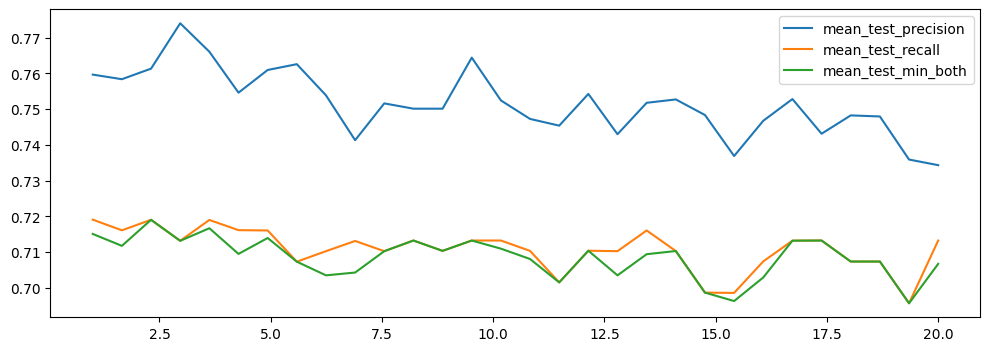

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for score in ['mean_test_precision', 'mean_test_recall', 'mean_test_min_both']:
    plt.plot([_[1] for _ in metrics_df['param_model__class_weight']], metrics_df[score], label=score)
plt.legend();

### 4-3-4- Scoring Metrics

Whether we are using `GridSearchCV` or any other strategy to find the best combination of hyperparameters along with the proper model selection regarding our task, we will evaluate and compare the different models based on a _metric_. A variety of metrics are predefined [here](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics). The predefined `string` scoring metrics are defined [here](https://scikit-learn.org/stable/modules/model_evaluation.html).

### 4-3-5- Visualizations

For classification, we can use a confusion matrix to explore the ratio of TPR and FPR.

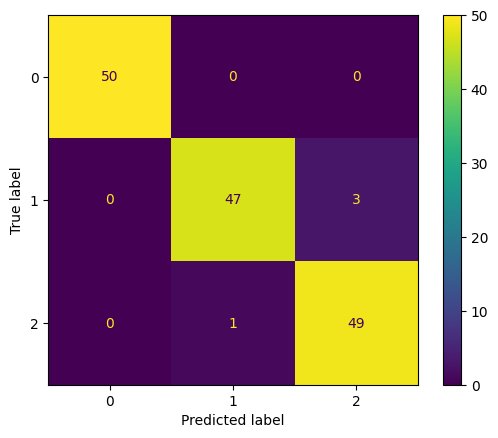

In [37]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0, max_iter=1000)
clf.fit(X, y)
y_pred = clf.predict(X)

cm = confusion_matrix(y, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot();

Using a rather simple scatter plot for the regression tasks, we can see if there is a positive correlation between the predicted values and the desired values:

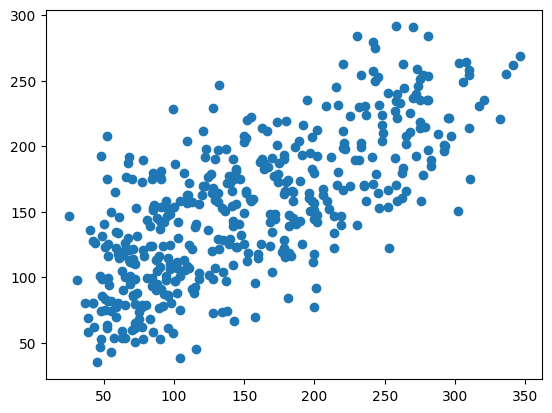

In [36]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X, y = load_diabetes(return_X_y=True)
clf = LinearRegression()
clf.fit(X, y)
y_pred = clf.predict(X)
plt.scatter(y, y_pred);

For visualizing the learning/validation curves, please visit [here](https://scikit-learn.org/stable/modules/classes.html#visualization).

# 5- Post-Processing

These methods can be applied once our model has been trained in order to modify the outcomes and get the best results.

## 5-1- Meta Estimators

In some cases, it's a good idea to combine multiple estimators together and associating a weight to each of them, such that the decision is taken based on the `VotingClassifier`. However, this a post-processing stem, after the result by models are produced.

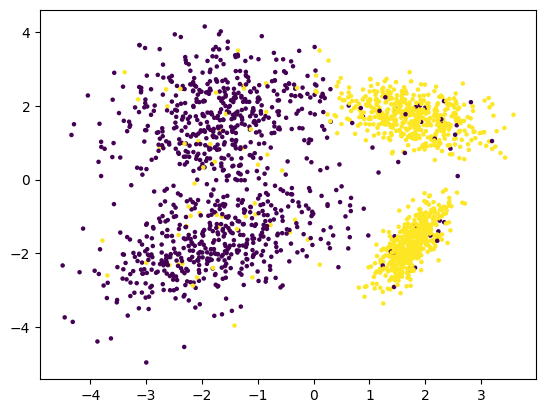

In [40]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=2000, n_features=2, n_redundant=0, random_state=21, class_sep=1.75, flip_y=0.1)
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, s=5);

In [41]:
import numpy as np

def make_plots():
    X_new = np.concatenate([
        np.random.uniform(np.min(X[:, 0]), np.max(X[:, 0]), (20000, 1)),
        np.random.uniform(np.min(X[:, 1]), np.max(X[:, 1]), (20000, 1))
    ], axis=1)
    plt.figure(figsize=(16, 4))
    plt.subplot(141)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
    plt.title("original data")
    plt.subplot(142)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf1.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens1")
    plt.subplot(143)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf2.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens2")
    plt.subplot(144)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf3.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens3");

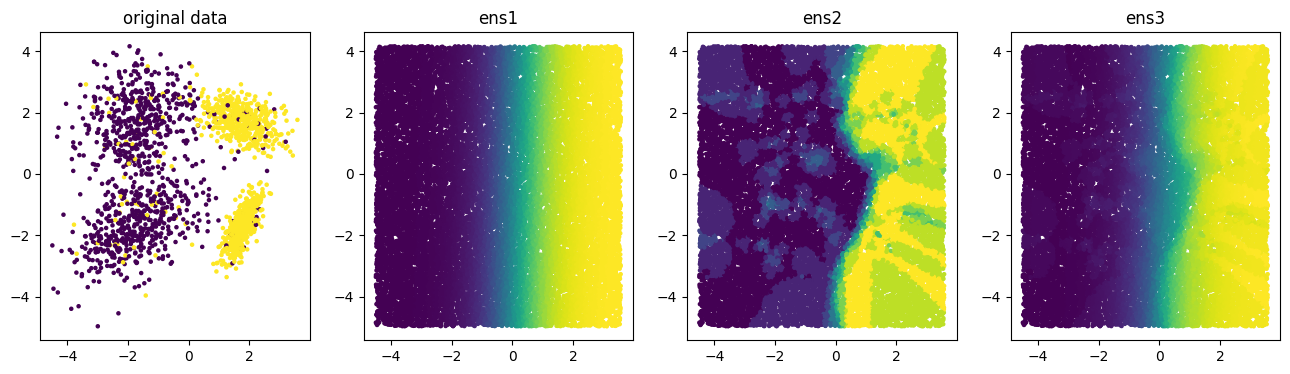

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression().fit(X, y)
clf2 = KNeighborsClassifier(n_neighbors=10).fit(X, y)
clf3 = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2)], voting='soft', weights=[10.5, 2.5]).fit(X, y)

make_plots()

## 5-2- Thresholder

The thresholder can help tweak recall and precision of a model by moving the threshold value of predict_proba, and it's mostly applied on binary classification. Commonly this threshold is set at 0.5 for two classes. This meta-model can decorate an estimator with two classes such that the threshold moves. Full description of the related `scikit-lego` methods can be found [here](https://scikit-lego.netlify.app/meta.html).

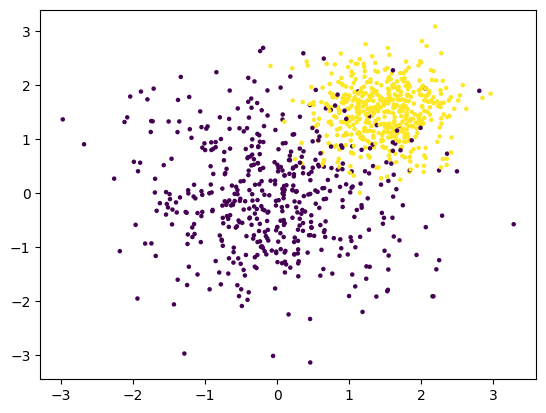

In [43]:
import matplotlib.pylab as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(1000, centers=[(0, 0), (1.5, 1.5)], cluster_std=[1, 0.5])
plt.scatter(X[:, 0], X[:, 1], c=y, s=5);

In [44]:
%%capture
!pip install scikit-lego

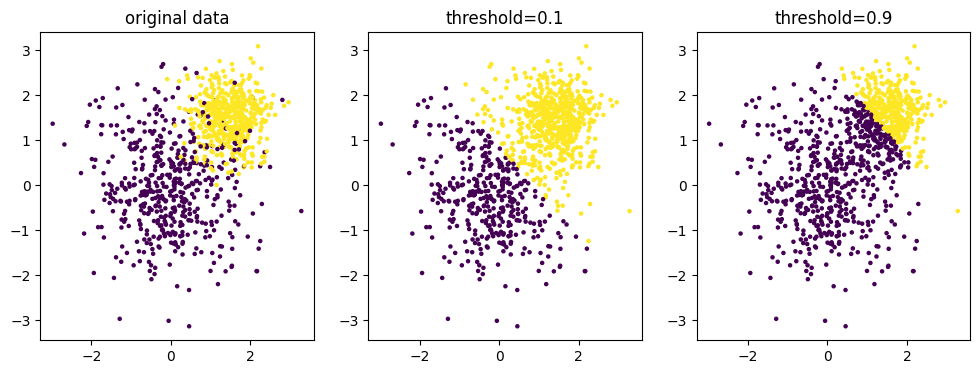

In [45]:
from sklearn.linear_model import LogisticRegression
from sklego.meta import Thresholder

m1 = Thresholder(LogisticRegression(solver='lbfgs'), threshold=0.1).fit(X, y)
m2 = Thresholder(LogisticRegression(solver='lbfgs'), threshold=0.9).fit(X, y)

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
plt.title("original data")
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=m1.predict(X), s=5)
plt.title("threshold=0.1")
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=m2.predict(X), s=5)
plt.title("threshold=0.9");

## 5-3- GroupedPredictor

Consider that instead of having one general model on our dataset, we train different models for each category of our choice all along each other. For example, instead of applying one-hot-encoding to our categorical column, we can have individual models for each category. In this case, according to the category that our new data point belongs, we decide to predict its corresponding target value using a specific model.

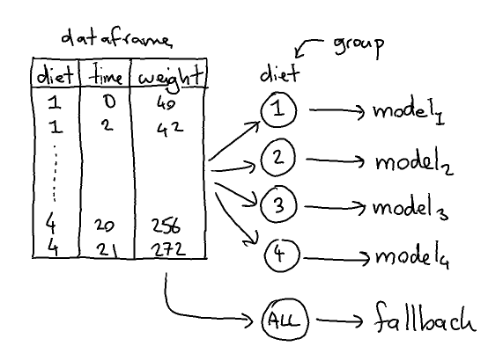

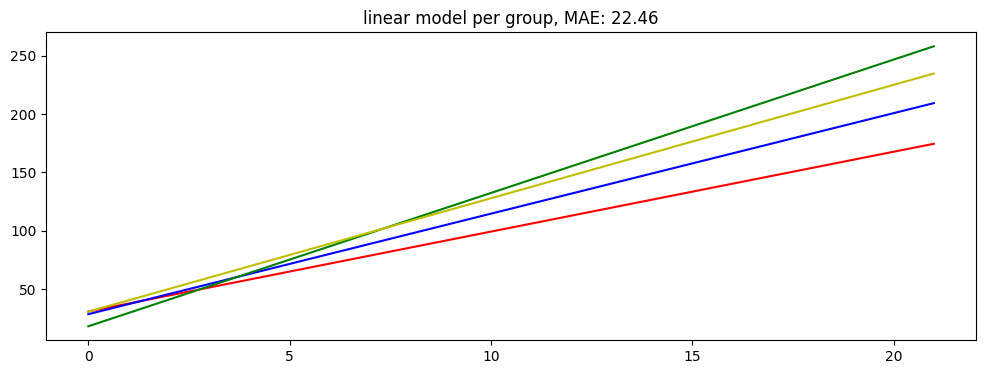

In [46]:
from sklego.datasets import load_chicken
from sklearn.linear_model import LinearRegression
from sklego.meta import GroupedPredictor
from sklearn.metrics import mean_absolute_error
import matplotlib.pylab as plt
import numpy as np

df = load_chicken(as_frame=True)
X = df[['diet', 'time']]
y = df['weight']

model = GroupedPredictor(LinearRegression(), groups=["diet"])
model.fit(X, y)
metric_df = df[['diet', 'time', 'weight']].assign(pred=lambda d: model.predict(d[['diet', 'time']]))
metric = mean_absolute_error(metric_df['weight'], metric_df['pred'])
plt.figure(figsize=(12, 4))
# plt.scatter(df['time'], df['weight'])
for i in [1, 2, 3, 4]:
    pltr = metric_df[['time', 'diet', 'pred']].drop_duplicates().loc[lambda d: d['diet'] == i]
    plt.plot(pltr['time'], pltr['pred'], color='.rbgy'[i])
plt.title(f"linear model per group, MAE: {np.round(metric, 2)}");